In [3]:
import pandas as pd
import numpy as np

In [2]:
#Importing Historical Cryptocurrency & NASDAQ Composite Index
df_coin = pd.read_csv("consolidated_coin_data.csv")
df_CMC = pd.read_csv("CMC200.csv")
df_NASDAQ = pd.read_csv("NASDAQ_index.csv")

In [115]:
#Converting Date to an Integer for easier modification.
#Date is coverted such that the oldest date for crypto, '2013-04-28' is 0.
df_coin['Date'] = pd.to_datetime(df_coin['Date']).sub(pd.Timestamp('2013-04-28')).dt.days
df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date']).sub(pd.Timestamp('2013-04-28')).dt.days

In [116]:
df_coin.head(10)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,2411,1.29,1.32,1.25,1.25,46048752.0,824588509.0
1,tezos,2410,1.24,1.32,1.21,1.29,41462224.0,853213342.0
2,tezos,2409,1.25,1.26,1.20,1.24,27574097.0,817872179.0
3,tezos,2408,1.33,1.34,1.25,1.25,24127567.0,828296390.0
4,tezos,2407,1.31,1.37,1.31,1.33,28706667.0,879181680.0
5,tezos,2406,1.28,1.34,1.28,1.31,32270224.0,867085098.0
6,tezos,2405,1.26,1.35,1.22,1.28,44240281.0,845073679.0
7,tezos,2404,1.24,1.27,1.16,1.26,47723271.0,829672736.0
8,tezos,2403,1.24,1.28,1.23,1.24,54828808.0,822065277.0
9,tezos,2402,1.33,1.33,1.21,1.24,64954006.0,815688075.0


In [117]:
df_nasdaq.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,-1210,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
1,-1209,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2,-1208,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
3,-1207,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
4,-1206,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
5,-1203,2324.780029,2326.280029,2302.209961,2312.409912,2312.409912,2077890000
6,-1202,2297.280029,2298.850098,2272.699951,2282.310059,2282.310059,2368320000
7,-1201,2289.459961,2313.030029,2274.120117,2307.899902,2307.899902,2318350000
8,-1200,2303.310059,2322.560059,2303.290039,2316.739990,2316.739990,2254170000
9,-1199,2316.979980,2322.540039,2279.199951,2287.989990,2287.989990,2637770000


In [118]:
#Modification of Nasdaq information to include weekends and holidays where the market is not open.
#Done to ensure that Dates where the crypto market is open but NASDAQ is not will not result in a null value.
#fillna can technically be used, but no feasible method of filling avilable.

returnData = []

#Loops to generate Nasdaq values from oldest available date for crpto to the newest.
for i in range(df_coin['Date'].max() + 1):
    lastAvailableDate = i
    notCurrentDay = False
    
    #If a date the crpyto market is open and the NASDAQ does not, the query will get a length of 0.
    #Loop until a prior date where Nasdaq is open.
    #Infinite loop may occur if oldest Nasdaq data is not a week older than odlest Crypto data.
    while len(df_nasdaq.loc[df_nasdaq['Date'] == lastAvailableDate]) < 1:
        lastAvailableDate -= 1
        notCurrentDay = True
    
    #Queries a row of nasdaq data for the last available date on or before the cryptocurrency price date.
    row = df_nasdaq.loc[df_nasdaq['Date'] == lastAvailableDate].values.tolist()
    
    #Retrieves the crypto currency date, open and close of the Nasdaq.
    #If Nasdaq is not open on that day, obtain close as the open and close of last open date.
    if notCurrentDay:
        returnData.append([i, row[0][4], row[0][4]])
    #If Nasdaq is open on that day, obtain that day's open and close as the open and close of last open date.
    else:
        returnData.append([i, row[0][1], row[0][4]])
                

In [119]:
#Fitting list to a dataframe.
df_nasdaq = pd.DataFrame(data = returnData, columns = ['Date', 'NASDAQ Open', 'NASDAQ Close'])

In [120]:
df_nasdaq.head(100)

,Date,NASDAQ Open,NASDAQ Close
0,0,3279.260010,3279.260010
1,1,3290.310059,3307.020020
2,2,3308.050049,3328.790039
3,3,3325.350098,3299.129883
4,4,3306.149902,3340.620117
...,...,...,...
95,95,3654.179932,3675.739990
96,96,3671.110107,3689.590088
97,97,3689.590088,3689.590088
98,98,3689.590088,3689.590088


In [121]:
#Merging the coin data and nasdaq data on where dates match.
#Left outer join to perserve descending date order for future modification.
df_coin = pd.merge(how ='left', left = df_coin, right = df_nasdaq, on = ['Date'])

In [122]:
df_coin.head(100)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close
0,tezos,2411,1.29,1.32,1.25,1.25,46048752.0,824588509.0,8557.450195,8566.669922
1,tezos,2410,1.24,1.32,1.21,1.29,41462224.0,853213342.0,8460.719727,8520.639648
2,tezos,2409,1.25,1.26,1.20,1.24,27574097.0,817872179.0,8672.839844,8567.990234
3,tezos,2408,1.33,1.34,1.25,1.25,24127567.0,828296390.0,8665.469727,8665.469727
4,tezos,2407,1.31,1.37,1.31,1.33,28706667.0,879181680.0,8665.469727,8665.469727
...,...,...,...,...,...,...,...,...,...,...
95,tezos,2316,1.07,1.08,1.01,1.04,10847063.0,687684125.0,7962.879883,7962.879883
96,tezos,2315,1.00,1.07,0.99,1.06,10015534.0,703253249.0,8015.160156,7962.879883
97,tezos,2314,1.05,1.07,1.00,1.00,14710732.0,659166382.0,7945.779785,7973.390137
98,tezos,2313,1.13,1.13,1.04,1.05,9878622.0,693879132.0,7798.350098,7856.879883


In [123]:
#Generates historical returns of crpyto for each day of crypto data.
returnData = []
rows = len(df_coin.index)

#Iterates through each row.
for row in df_coin.itertuples():
    #Ensures that an index error will not occur by making sure at least 28 rows are after current row.
    if row.Index < rows - 28:
        
        #Queries to get the currency and date for 28 rows under.
        nextMonthRowCurrency = (df_coin.loc[row.Index + 28, 'Currency'])
        nextMonthRowDate = (df_coin.loc[row.Index + 28, 'Date'])
        
        #If the 28th row below does not have same currency and expected date, there is not enough data to generate all historical
        #return values.
        if nextMonthRowCurrency == row.Currency and row.Date == nextMonthRowDate + 28:
            
            #Queries to get Market Open and Close for previous day
            previousDayMarketClose = float(df_coin.loc[row.Index + 1, 'NASDAQ Close'])
            previousDayMarketOpen = float(df_coin.loc[row.Index + 1, 'NASDAQ Open'])
            
            #Queries to get Market Open and Close for previous day
            previousDayClose = float(df_coin.loc[row.Index + 1, 'Close'])
            previousDayOpen = float(df_coin.loc[row.Index + 1, 'Open'])
            
            #Queries to get Market Open and Close for 7, 14, and 28 days.
            previousWeekOpen = float(df_coin.loc[row.Index + 7, 'Open'])
            previousTwoWeekOpen = float(df_coin.loc[row.Index + 14, 'Open'])
            previousMonthOpen = float(df_coin.loc[row.Index + 28, 'Open'])
            
            #Calculates and adds previous historical data for the currency on a date.
            #If check is to ensure that a dividing by 0 error does not occur.
            if previousDayOpen > 0 and previousWeekOpen > 0 and previousTwoWeekOpen > 0 and previousMonthOpen > 0 and row.Open > 0:
                returnData.append([nextMonthRowCurrency, row.Date, previousDayClose / previousMonthOpen - 1, previousDayClose / previousTwoWeekOpen - 1, previousDayClose / previousWeekOpen - 1, previousDayClose / previousDayOpen - 1, previousDayMarketClose / previousDayMarketOpen - 1, row.Close / row.Open - 1])

In [124]:
#Changes data from a list to a dataframe.
df_PreviousDayReturn = pd.DataFrame(data = returnData, columns = ['Currency', 'Date', 'Previous Month Return', 'Previous 2 Week Return', 'Previous Week Return', 'Previous Day Return', 'Previous Day Market Return', 'Daily Return'])

In [125]:
df_PreviousDayReturn.head(25000)

,Currency,Date,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
0,tezos,2411,0.387097,0.057377,0.040323,0.040323,0.007082,-0.031008
1,tezos,2410,0.393258,0.008130,0.000000,-0.008000,-0.012089,0.040323
2,tezos,2409,0.436782,0.077586,-0.060150,-0.060150,0.000000,-0.008000
3,tezos,2408,0.528736,0.146552,-0.050000,0.015267,0.000000,-0.060150
4,tezos,2407,0.488636,0.119658,0.073770,0.023438,-0.001905,0.015267
...,...,...,...,...,...,...,...,...
24713,bitcoin-sv,32,-0.179894,0.058020,-0.006410,0.003236,-0.001195,-0.035714
24714,bitcoin-sv,31,-0.279720,0.095745,0.000000,-0.003226,-0.002576,0.003236
24715,bitcoin-sv,30,-0.295455,-0.054878,-0.028213,-0.040248,0.000000,-0.003226
24716,bitcoin-sv,29,-0.256293,-0.003067,-0.018127,0.041667,0.000000,-0.040248


In [126]:
print (df_coin.dtypes)

Currency         object
Date              int64
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Market Cap      float64
NASDAQ Open     float64
NASDAQ Close    float64
dtype: object


In [127]:
print (df_PreviousDayReturn.dtypes)

Currency                       object
Date                            int64
Previous Month Return         float64
Previous 2 Week Return        float64
Previous Week Return          float64
Previous Day Return           float64
Previous Day Market Return    float64
Daily Return                  float64
dtype: object


In [128]:
#Merges Coin price data and Nasdaq data with historical return datas on where currency and date matches.
df_combine = pd.merge(how ='inner', left = df_coin, right = df_PreviousDayReturn, on = ['Currency', 'Date'])

In [129]:
df_combine.head(25000)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
0,tezos,2411,1.29,1.32,1.25,1.25,46048752.0,824588509.0,8557.450195,8566.669922,0.387097,0.057377,0.040323,0.040323,0.007082,-0.031008
1,tezos,2410,1.24,1.32,1.21,1.29,41462224.0,853213342.0,8460.719727,8520.639648,0.393258,0.008130,0.000000,-0.008000,-0.012089,0.040323
2,tezos,2409,1.25,1.26,1.20,1.24,27574097.0,817872179.0,8672.839844,8567.990234,0.436782,0.077586,-0.060150,-0.060150,0.000000,-0.008000
3,tezos,2408,1.33,1.34,1.25,1.25,24127567.0,828296390.0,8665.469727,8665.469727,0.528736,0.146552,-0.050000,0.015267,0.000000,-0.060150
4,tezos,2407,1.31,1.37,1.31,1.33,28706667.0,879181680.0,8665.469727,8665.469727,0.488636,0.119658,0.073770,0.023438,-0.001905,0.015267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24717,bitcoin-sv,32,3.08,3.09,2.88,2.97,0.0,53812628.0,3473.209961,3491.300049,-0.179894,0.058020,-0.006410,0.003236,-0.001195,-0.035714
24718,bitcoin-sv,31,3.09,3.12,3.02,3.10,0.0,55971819.0,3471.669922,3467.520020,-0.279720,0.095745,0.000000,-0.003226,-0.002576,0.003236
24719,bitcoin-sv,30,3.10,3.13,3.02,3.09,0.0,55813732.0,3497.899902,3488.889893,-0.295455,-0.054878,-0.028213,-0.040248,0.000000,-0.003226
24720,bitcoin-sv,29,3.23,3.26,3.02,3.10,0.0,55882132.0,3459.139893,3459.139893,-0.256293,-0.003067,-0.018127,0.041667,0.000000,-0.040248


In [257]:
#Testing to make sure no null valeus exists.
df_combine.isna().sum()
tezos=df_combine.loc[df_combine['Currency'] =='tezos']
tezos

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
0,tezos,2411,1.29,1.32,1.25,1.25,46048752.0,824588509.0,8557.450195,8566.669922,0.387097,0.057377,0.040323,0.040323,0.007082,-0.031008
1,tezos,2410,1.24,1.32,1.21,1.29,41462224.0,853213342.0,8460.719727,8520.639648,0.393258,0.008130,0.000000,-0.008000,-0.012089,0.040323
2,tezos,2409,1.25,1.26,1.20,1.24,27574097.0,817872179.0,8672.839844,8567.990234,0.436782,0.077586,-0.060150,-0.060150,0.000000,-0.008000
3,tezos,2408,1.33,1.34,1.25,1.25,24127567.0,828296390.0,8665.469727,8665.469727,0.528736,0.146552,-0.050000,0.015267,0.000000,-0.060150
4,tezos,2407,1.31,1.37,1.31,1.33,28706667.0,879181680.0,8665.469727,8665.469727,0.488636,0.119658,0.073770,0.023438,-0.001905,0.015267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,tezos,32,3.08,3.09,2.88,2.97,0.0,53812628.0,3473.209961,3491.300049,-0.179894,0.058020,-0.006410,0.003236,-0.001195,-0.035714
1350,tezos,31,3.09,3.12,3.02,3.10,0.0,55971819.0,3471.669922,3467.520020,-0.279720,0.095745,0.000000,-0.003226,-0.002576,0.003236
1351,tezos,30,3.10,3.13,3.02,3.09,0.0,55813732.0,3497.899902,3488.889893,-0.295455,-0.054878,-0.028213,-0.040248,0.000000,-0.003226
1352,tezos,29,3.23,3.26,3.02,3.10,0.0,55882132.0,3459.139893,3459.139893,-0.256293,-0.003067,-0.018127,0.041667,0.000000,-0.040248


In [258]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [259]:
#Selects X variables and Y variables of interest.
Y = tezos.values[:, 15]
Y = Y.astype('float')
X = tezos[['Open','Close','Previous Month Return']].values[:, :]
Y


array([-0.03100775,  0.04032258, -0.008     , ..., -0.00322581,
       -0.04024768,  0.04166667])

In [260]:
GBR = GradientBoostingRegressor(random_state = 100)

In [261]:
#Splits Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [262]:
#Fits data into a boosting regressor model.



GradientBoostingRegressor(random_state=100)

In [263]:
#Bad accuracy score, needs to improve
GBR.score(X_test, Y_test)

0.3321379792475616

In [264]:
Y_testResult = GBR.predict(X_test)

In [265]:
from sklearn.metrics import explained_variance_score

In [266]:
explained_variance_score(Y_test, Y_testResult)

0.33236368912263714

In [267]:
#Essentially a Linear Model, and highly dependent on opening price
Y = tezos.values[:, 15]
Y = Y.astype('float')
X = tezos.values[:, 2].reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR1 = GradientBoostingRegressor(random_state = 100)
GBR1.fit(X_train, Y_train)
GBR1.score(X_test, Y_test)

-0.33580733982088207

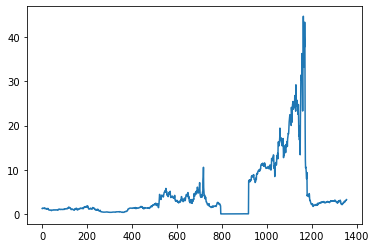

In [268]:
# tezos price change 
%matplotlib inline
import matplotlib.pyplot as plt
tezos['Close'].plot()
plt.show()

In [270]:
binance_coin=df_combine.loc[df_combine['Currency'] =='binance-coin']
bitcoin=df_combine.loc[df_combine['Currency'] =='bitcoin']
bitcoin_cash=df_combine.loc[df_combine['Currency'] =='bitcoin-cash']
bitcoin_sv=df_combine.loc[df_combine['Currency'] =='bitcoin-sv']
cardano=df_combine.loc[df_combine['Currency'] =='cardano']
eos=df_combine.loc[df_combine['Currency'] =='eos']
ethereum=df_combine.loc[df_combine['Currency'] =='ethereum']
litecoin=df_combine.loc[df_combine['Currency'] =='litecoin']
stellar=df_combine.loc[df_combine['Currency'] =='stellar']
tether=df_combine.loc[df_combine['Currency'] =='tether']
tezos=df_combine.loc[df_combine['Currency'] =='tezos']
xrp=df_combine.loc[df_combine['Currency'] =='xrp']


In [305]:
# mean and SD of binance_coin daily return 
binance_coin.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,9.020449,9.389392,8.632953,9.039539,5.692736e+07,7.891960e+08,5742.407853,5742.929484,0.308300,0.143342,0.050141,0.005952,0.000127,0.005959
std,688.345843,8.786299,9.207662,8.321374,8.804994,1.163970e+08,1.117967e+09,1432.127544,1431.921611,1.878754,1.116520,0.402178,0.088528,0.006821,0.088527
min,28.000000,0.100000,0.100000,0.100000,0.100000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.997432,-0.978710,-0.977298,-0.401062,-0.042409,-0.401062
25%,623.750000,3.110000,3.170000,3.060000,3.110000,1.764235e+06,1.363236e+08,4636.600098,4635.240234,-0.149790,-0.102358,-0.067077,-0.020919,-0.001337,-0.020895
50%,1219.500000,4.310000,4.545000,4.140000,4.310000,5.083610e+06,2.026709e+08,5216.314941,5214.160156,-0.006699,0.000000,0.000000,-0.000105,0.000000,-0.000105
75%,1815.250000,12.710000,13.217500,12.080000,12.752500,5.356192e+07,1.061568e+09,7135.304809,7136.560059,0.186889,0.114327,0.066738,0.021051,0.002708,0.021051
max,2411.000000,50.410000,53.550000,47.270000,50.320000,1.730780e+09,5.479856e+09,8705.179688,8705.179688,24.000000,20.636364,7.666667,1.710000,0.047380,1.710000


In [306]:
bitcoin.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,3054.702093,3139.114157,2962.897680,3057.602286,3.641430e+09,5.198771e+10,5742.407853,5742.929484,0.094805,0.041045,0.018928,0.002480,0.000127,0.002480
std,688.345843,3778.803670,3901.671061,3634.457292,3779.287257,6.573873e+09,6.582171e+10,1432.127544,1431.921611,0.399958,0.206027,0.122843,0.042752,0.006821,0.042752
min,28.000000,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08,3326.379883,3320.760010,-0.540108,-0.546555,-0.407893,-0.229283,-0.042409,-0.229283
25%,623.750000,380.077500,390.032500,373.325000,380.485000,2.291342e+07,5.329603e+09,4636.600098,4635.240234,-0.101163,-0.065161,-0.045709,-0.013000,-0.001337,-0.013000
50%,1219.500000,711.965000,737.740000,698.650000,713.440000,8.700620e+07,1.044220e+10,5216.314941,5214.160156,0.029736,0.015216,0.006718,0.001621,0.000000,0.001621
75%,1815.250000,5861.642500,6007.512500,5722.060000,5903.787500,4.681677e+09,1.005334e+11,7135.304809,7136.560059,0.171890,0.107640,0.068023,0.018264,0.002708,0.018264
max,2411.000000,19475.800000,20089.000000,18974.100000,19497.400000,4.510573e+10,3.265025e+11,8705.179688,8705.179688,4.500073,2.069500,1.050837,0.416811,0.047380,0.416811


In [307]:
bitcoin_cash.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2.143000e+03,2.143000e+03,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,1307.339711,260.786440,275.616850,245.691801,260.515432,4.076325e+08,4.456854e+09,5898.034277,5898.374262,5.552951,2.744428,1.266741,0.002046,0.000088,0.000176
std,669.546609,478.541379,512.992467,443.039872,478.181125,7.965263e+08,8.103387e+09,1424.415865,1424.399553,41.604337,29.992200,21.595262,0.085075,0.006943,0.095443
min,28.000000,0.010000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.999869,-0.999891,-0.999901,-0.500000,-0.042409,-1.000000
25%,804.500000,1.000000,1.000000,1.000000,1.000000,8.284465e+04,6.951589e+06,4798.354981,4806.309815,-0.070957,-0.033583,-0.018495,-0.002119,-0.001394,-0.002627
50%,1340.000000,1.000000,1.000000,1.000000,1.000000,2.244990e+06,1.723337e+08,5462.689941,5462.689941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1875.500000,327.285000,342.035000,312.500000,327.165000,4.254885e+08,5.663699e+09,7261.205079,7263.870117,0.000000,0.000000,0.000000,0.000000,0.002630,0.000000
max,2411.000000,3909.000000,4355.620000,3038.010000,3923.070000,1.188960e+10,6.617106e+10,8705.179688,8705.179688,689.240000,456.232323,439.700000,1.000000,0.047380,1.000000


In [308]:
bitcoin_sv.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,23.729287,24.908289,22.587546,23.747085,7.027276e+07,6.477926e+08,5742.407853,5742.929484,0.414708,0.200499,0.081831,0.006340,0.000127,0.006346
std,688.345843,42.412389,44.626637,40.309067,42.412825,1.540000e+08,7.901170e+08,1432.127544,1431.921611,2.131739,1.391751,0.771426,0.095640,0.006821,0.095639
min,28.000000,0.100000,0.100000,0.100000,0.100000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.997432,-0.978710,-0.977298,-0.468459,-0.042409,-0.468459
25%,623.750000,3.110000,3.170000,3.060000,3.110000,1.764235e+06,1.343646e+08,4636.600098,4635.240234,-0.156788,-0.109245,-0.069048,-0.021744,-0.001337,-0.021622
50%,1219.500000,4.310000,4.545000,4.140000,4.310000,5.056160e+06,1.986416e+08,5216.314941,5214.160156,-0.020460,-0.007643,-0.003072,-0.001242,0.000000,-0.001242
75%,1815.250000,14.950000,15.775000,14.142500,14.947500,6.387526e+07,1.120987e+09,7135.304809,7136.560059,0.160499,0.099841,0.058425,0.019648,0.002708,0.019648
max,2411.000000,238.530000,255.880000,233.890000,238.340000,1.730780e+09,4.254524e+09,8705.179688,8705.179688,24.000000,21.170213,20.265306,1.710000,0.047380,1.710000


In [309]:
cardano.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1.354000e+03,1.354000e+03,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,1402.830133,3.421248,3.614978,3.215030,3.424778,6.995043e+07,2.166411e+09,6280.497782,6280.554361,0.366437,0.108829,0.047649,0.005528,0.000032,0.005346
std,830.284472,6.865660,7.355876,6.315483,6.868739,1.447321e+08,3.614510e+09,1675.014833,1675.011730,1.920192,0.747118,0.411307,0.112045,0.007095,0.112259
min,28.000000,0.010000,0.010000,0.010000,0.010000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.750000,-0.699304,-0.666667,-0.500000,-0.042409,-0.500000
25%,366.250000,0.040000,0.050000,0.040000,0.040000,3.614792e+06,2.943751e+08,4251.780151,4245.399902,-0.250000,-0.187500,-0.111111,-0.014043,-0.001437,-0.014151
50%,1734.500000,0.130000,0.130000,0.115000,0.130000,2.428575e+07,1.023724e+09,6930.155029,6936.580078,-0.043057,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2072.750000,2.730000,2.810000,2.647500,2.730000,7.899057e+07,2.182218e+09,7697.152588,7700.709961,0.110589,0.110685,0.042337,0.001907,0.002718,0.001907
max,2411.000000,44.530000,53.150000,37.900000,44.730000,1.713770e+09,2.888587e+10,8705.179688,8705.179688,17.542735,9.161593,3.873908,1.400000,0.047380,1.400000


In [310]:
eos.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,6.219924,6.511615,5.912936,6.234291,4.301901e+08,1.760937e+09,5742.407853,5742.929484,0.181237,0.066818,0.027768,0.004108,0.000127,0.004110
std,688.345843,6.633751,7.101218,6.120017,6.666595,8.126590e+08,2.705386e+09,1432.127544,1431.921611,1.108922,0.529865,0.265695,0.084634,0.006821,0.084634
min,28.000000,0.490000,0.520000,0.480000,0.490000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.972920,-0.978710,-0.977298,-0.401062,-0.042409,-0.401062
25%,623.750000,2.910000,3.010000,2.830000,2.910000,1.828795e+06,1.458570e+08,4636.600098,4635.240234,-0.179200,-0.121926,-0.074244,-0.020888,-0.001337,-0.020864
50%,1219.500000,3.860000,3.930000,3.800000,3.860000,6.156500e+06,2.365953e+08,5216.314941,5214.160156,-0.039089,-0.007798,-0.002862,-0.000998,0.000000,-0.000998
75%,1815.250000,6.472500,6.760000,6.122500,6.482500,5.870815e+08,2.955169e+09,7135.304809,7136.560059,0.133238,0.099233,0.058878,0.020257,0.002708,0.020257
max,2411.000000,50.410000,53.550000,47.270000,50.320000,5.394932e+09,1.776945e+10,8705.179688,8705.179688,17.542735,9.161593,3.873908,1.710000,0.047380,1.710000


In [311]:
ethereum.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,265.044920,273.758943,255.226493,265.121254,1.446226e+09,1.518034e+10,5742.407853,5742.929484,0.158134,0.062784,0.029124,0.003794,0.000127,0.003794
std,688.345843,252.618428,262.647362,240.517586,252.467570,2.625754e+09,2.093153e+10,1432.127544,1431.921611,0.623479,0.317566,0.199244,0.062278,0.006821,0.062278
min,28.000000,0.430000,0.480000,0.420000,0.430000,0.000000e+00,3.221363e+07,3326.379883,3320.760010,-0.997748,-0.997608,-0.997525,-0.731183,-0.042409,-0.731183
25%,623.750000,43.507500,45.715000,41.727500,43.620000,1.077802e+07,1.171870e+09,4636.600098,4635.240234,-0.168391,-0.107930,-0.069851,-0.020934,-0.001337,-0.020934
50%,1219.500000,215.330000,222.495000,207.935000,215.685000,3.243200e+07,6.325367e+09,5216.314941,5214.160156,0.000000,0.004002,0.001161,-0.000617,0.000000,-0.000617
75%,1815.250000,380.040000,390.635000,372.165000,380.542500,1.756184e+09,2.090909e+10,7135.304809,7136.560059,0.239059,0.131947,0.084182,0.023955,0.002708,0.023955
max,2411.000000,1397.480000,1432.880000,1290.600000,1396.420000,1.866147e+10,1.354007e+11,8705.179688,8705.179688,4.500073,2.069500,1.612740,0.507042,0.047380,0.507042


In [312]:
litecoin.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1219.500000,37.188125,38.719186,35.510294,37.195545,5.161475e+08,2.056408e+09,5742.407853,5742.929484,0.163261,0.064263,0.026481,0.003028,0.000127,0.003036
std,688.345843,53.071533,55.744217,50.074712,53.038555,1.085804e+09,3.034489e+09,1432.127544,1431.921611,1.045640,0.512357,0.247041,0.071025,0.006821,0.071023
min,28.000000,1.150000,1.340000,1.110000,1.160000,0.000000e+00,3.789242e+07,3326.379883,3320.760010,-0.605442,-0.699304,-0.571246,-0.401062,-0.042409,-0.401062
25%,623.750000,3.577500,3.630000,3.490000,3.577500,1.828795e+06,1.460878e+08,4636.600098,4635.240234,-0.164634,-0.111234,-0.069527,-0.020797,-0.001337,-0.020777
50%,1219.500000,8.935000,9.400000,8.570000,8.955000,6.406060e+06,2.753640e+08,5216.314941,5214.160156,-0.020690,-0.007441,-0.002706,-0.002090,0.000000,-0.002090
75%,1815.250000,56.017500,57.437500,54.495000,56.060000,3.732722e+08,3.273861e+09,7135.304809,7136.560059,0.145289,0.093897,0.053239,0.019317,0.002708,0.019317
max,2411.000000,359.130000,375.290000,335.670000,358.340000,6.961680e+09,1.948262e+10,8705.179688,8705.179688,17.542735,9.161593,3.873908,1.268765,0.047380,1.268765


In [313]:
stellar.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1.354000e+03,1.354000e+03,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,1402.830133,3.447171,3.641677,3.240458,3.450724,9.685672e+07,2.076364e+09,6280.497782,6280.554361,0.283865,0.099002,0.039301,0.005738,0.000032,0.005556
std,830.284472,6.852872,7.342845,6.302732,6.855937,1.400023e+08,2.383526e+09,1675.014833,1675.011730,1.462526,0.694372,0.330639,0.102947,0.007095,0.103180
min,28.000000,0.010000,0.010000,0.010000,0.010000,0.000000e+00,3.789242e+07,3326.379883,3320.760010,-0.750000,-0.699304,-0.666667,-0.500000,-0.042409,-0.500000
25%,366.250000,0.080000,0.090000,0.080000,0.080000,3.920518e+06,2.924934e+08,4251.780151,4245.399902,-0.237012,-0.153846,-0.095364,-0.021180,-0.001437,-0.021180
50%,1734.500000,0.230000,0.240000,0.220000,0.230000,4.236845e+07,1.265575e+09,6930.155029,6936.580078,-0.070831,-0.001664,0.000000,0.000000,0.000000,0.000000
75%,2072.750000,2.730000,2.810000,2.647500,2.730000,1.293257e+08,3.500450e+09,7697.152588,7700.709961,0.148993,0.094407,0.052632,0.016363,0.002718,0.016363
max,2411.000000,44.530000,53.150000,37.900000,44.730000,1.513270e+09,1.602204e+10,8705.179688,8705.179688,17.542735,9.161593,3.873908,1.268765,0.047380,1.268765


In [314]:
tether.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2.143000e+03,2.143000e+03,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,1307.339711,4.155964,4.255208,4.025002,4.140723,3.218847e+09,1.016320e+09,5898.034277,5898.374262,1.090531,0.460492,0.128702,0.001301,0.000088,-0.000557
std,669.546609,18.261638,18.746679,17.580865,18.169341,6.923687e+09,1.309239e+09,1424.415865,1424.399553,10.119278,6.537605,3.293943,0.066316,0.006943,0.079162
min,28.000000,0.010000,0.010000,0.000000,0.000000,0.000000e+00,2.516000e+05,3326.379883,3320.760010,-0.999869,-0.999891,-0.999901,-0.500000,-0.042409,-1.000000
25%,804.500000,1.000000,1.000000,0.990000,1.000000,8.284465e+04,6.951590e+06,4798.354981,4806.309815,0.000000,0.000000,0.000000,0.000000,-0.001394,0.000000
50%,1340.000000,1.000000,1.000000,1.000000,1.000000,2.479570e+06,1.883783e+08,5462.689941,5462.689941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1875.500000,1.000000,1.010000,1.000000,1.000000,2.661580e+09,2.038711e+09,7261.205079,7263.870117,0.000000,0.000000,0.000000,0.000000,0.002630,0.000000
max,2411.000000,133.500000,136.000000,130.620000,133.480000,5.350913e+10,4.180012e+09,8705.179688,8705.179688,99.000000,99.000000,99.000000,1.000000,0.047380,1.000000


In [315]:
tezos.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,1354.000000,1354.000000,1354.000000,1354.00000,1354.000000,1.354000e+03,1.354000e+03,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,1402.830133,4.465716,4.729217,4.19548,4.471440,5.527669e+06,3.725234e+08,6280.497782,6280.554361,3.523471,2.125801,0.863906,0.004228,0.000032,0.004024
std,830.284472,6.495105,6.976190,5.95347,6.498544,9.090805e+06,3.416342e+08,1675.014833,1675.011730,24.845329,21.186896,12.786311,0.093852,0.007095,0.094110
min,28.000000,0.010000,0.010000,0.01000,0.010000,0.000000e+00,0.000000e+00,3326.379883,3320.760010,-0.750000,-0.699304,-0.666667,-0.500000,-0.042409,-0.500000
25%,366.250000,1.022500,1.070000,0.99000,1.020000,6.872212e+05,5.231113e+07,4251.780151,4245.399902,-0.224216,-0.149763,-0.094062,-0.026801,-0.001437,-0.027012
50%,1734.500000,2.055000,2.185000,1.91500,2.050000,2.516415e+06,2.854806e+08,6930.155029,6936.580078,-0.043717,-0.020165,-0.006571,0.000000,0.000000,0.000000
75%,2072.750000,4.197500,4.460000,3.94000,4.220000,6.738392e+06,6.614397e+08,7697.152588,7700.709961,0.184211,0.115084,0.072160,0.025712,0.002718,0.025712
max,2411.000000,44.530000,53.150000,37.90000,44.730000,1.238328e+08,1.481052e+09,8705.179688,8705.179688,261.000000,246.000000,217.000000,1.268765,0.047380,1.268765


In [316]:
xrp.describe()

,Date,Open,High,Low,Close,Volume,Market Cap,NASDAQ Open,NASDAQ Close,Previous Month Return,Previous 2 Week Return,Previous Week Return,Previous Day Return,Previous Day Market Return,Daily Return
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2.070000e+03,2.070000e+03,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1319.590821,3.672763,3.780198,3.530802,3.657010,4.063624e+08,8.338480e+09,5928.047795,5928.404627,0.217843,0.090464,0.037821,0.004787,0.000090,0.001893
std,678.136574,18.680547,19.173481,17.988945,18.586722,8.439973e+08,1.301282e+10,1440.092703,1440.063717,1.241547,0.604887,0.331740,0.100450,0.006953,0.114059
min,28.000000,0.010000,0.010000,0.000000,0.000000,0.000000e+00,3.122012e+07,3326.379883,3320.760010,-0.999869,-0.999891,-0.999901,-0.500000,-0.042409,-1.000000
25%,780.250000,0.010000,0.010000,0.010000,0.010000,4.333138e+05,2.361408e+08,4776.067382,4776.742310,-0.100000,-0.055042,-0.031138,0.000000,-0.001400,0.000000
50%,1376.500000,0.040000,0.040000,0.030000,0.040000,3.112360e+06,1.029798e+09,5661.864990,5662.164795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1893.750000,0.330000,0.340000,0.320000,0.330000,4.608823e+08,1.299689e+10,7315.375000,7326.222534,0.000000,0.000000,0.000000,0.000000,0.002632,0.000000
max,2411.000000,133.500000,136.000000,130.620000,133.480000,9.415068e+09,1.308535e+11,8705.179688,8705.179688,13.545455,6.000000,5.000000,2.000000,0.047380,2.000000


In [271]:
Y = binance_coin.values[:, 15]
Y = Y.astype('float')
X = binance_coin[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.35962682144593927

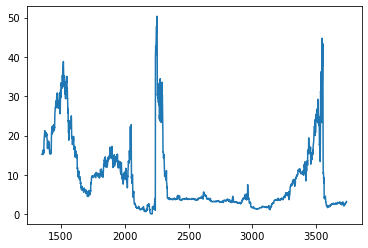

In [283]:
binance_coin['Close'].plot()
plt.show()

In [272]:
Y = bitcoin.values[:, 15]
Y = Y.astype('float')
X = bitcoin[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.1972037455198581

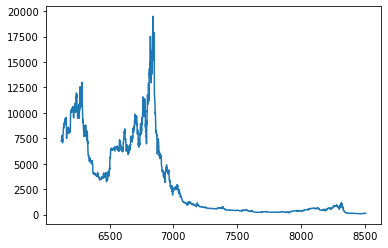

In [284]:
bitcoin['Close'].plot()
plt.show()

In [273]:
Y = bitcoin_cash.values[:, 15]
Y = Y.astype('float')
X = bitcoin_cash[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.6342028985963297

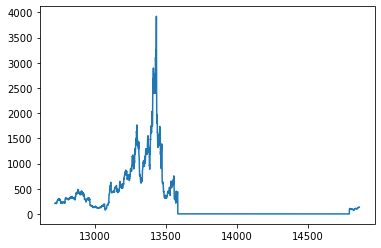

In [285]:
bitcoin_cash['Close'].plot()
plt.show()

In [274]:
Y = bitcoin_sv.values[:, 15]
Y = Y.astype('float')
X = bitcoin_sv[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.24874616612763667

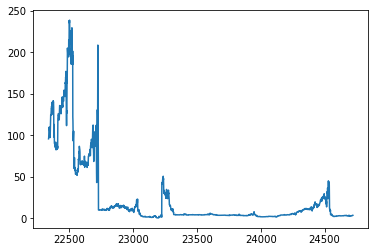

In [286]:
bitcoin_sv['Close'].plot()
plt.show()

In [275]:
Y = cardano.values[:, 15]
Y = Y.astype('float')
X = cardano[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.27714903410717673

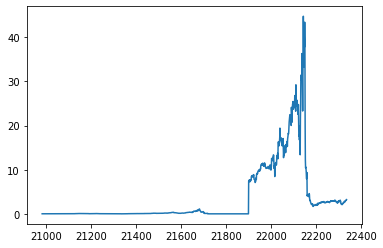

In [287]:
cardano['Close'].plot()
plt.show()

In [276]:
Y = eos.values[:, 15]
Y = Y.astype('float')
X = eos[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.28533841916746205

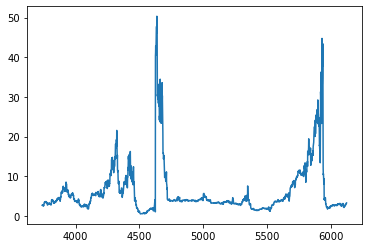

In [288]:
eos['Close'].plot()
plt.show()

In [277]:

Y = ethereum.values[:, 15]
Y = Y.astype('float')
X = ethereum[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.20115562248737173

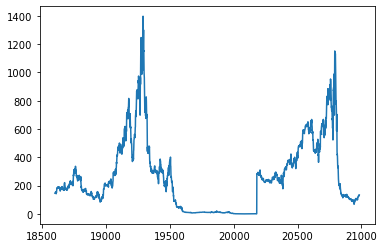

In [289]:
ethereum['Close'].plot()
plt.show()

In [278]:

Y = litecoin.values[:, 15]
Y = Y.astype('float')
X = litecoin[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.1762974892928616

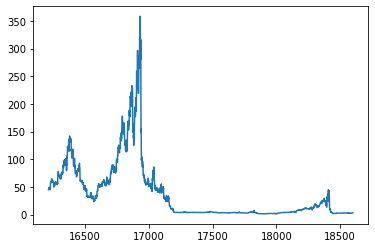

In [290]:
litecoin['Close'].plot()
plt.show()

In [279]:

Y = stellar.values[:, 15]
Y = Y.astype('float')
X = stellar[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.20247392758434124

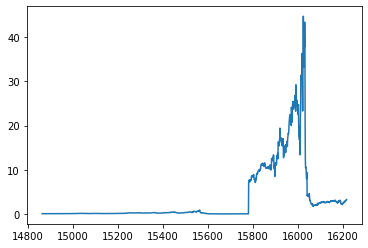

In [291]:
stellar['Close'].plot()
plt.show()

In [280]:
Y = tether.values[:, 15]
Y = Y.astype('float')
X = tether[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.951846686643215

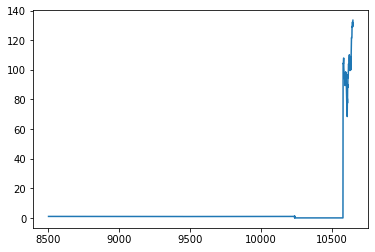

In [292]:
tether['Close'].plot()
plt.show()

In [281]:
Y = tezos.values[:, 15]
Y = Y.astype('float')
X = tezos[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)

0.3321379792475616

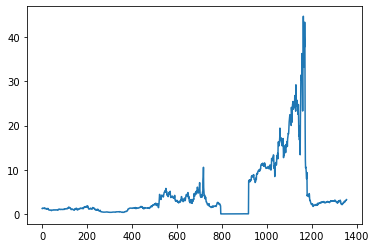

In [293]:
tezos['Close'].plot()
plt.show()

In [282]:


Y = xrp.values[:, 15]
Y = Y.astype('float')
X = xrp[['Open','Close','Previous Month Return']].values[:, :]
GBR = GradientBoostingRegressor(random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
GBR.fit(X_train, Y_train)
GBR.score(X_test, Y_test)


0.3719350009289283

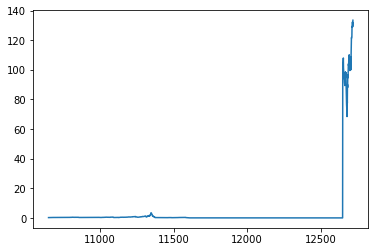

In [294]:
xrp['Close'].plot()
plt.show()